# Customer Segmentation in Python

Import modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Read dataset

In [2]:
online = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 1. Cohort Analysis

In this first chapter, you will learn about cohorts and how to analyze them. You will create your own customer cohorts, get some metrics and visualize your results.

### Assign daily acquisition cohort

As you have seen in the video, defining a cohort is the first step to cohort analysis. You will now create daily cohorts based on the day each customer has made their first transaction.

In [3]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [4]:
# Define a function that will parse the month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceMonth column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01


### Calculate time offset in days

Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months and days for Invoice and Cohort Date using the get_date_int() function that's been already defined for you:

In [5]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

The online data has been loaded, you can print its header to the console by calling online.head().

In [6]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

Now, we have six different data sets with year, month and day values for Invoice and Cohort dates - invoice_year, cohort_year, invoice_month, cohort_month, invoice_day, and cohort_day.

In this exercise you will calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two. This will be your days offset which we will use in the next exercise to visualize the customer count.

In [7]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff  + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,2010-12-01,1.0


### Customer retention

Customer retention is a very useful metric to understand how many of all the customers are still active.

### Calculate retention rate from scratch

You have seen how to create retention and average quantity metrics table for the monthly acquisition cohorts. Now it's you time to build the retention metrics by yourself.

Also, we have created a loaded a groupby object as grouping DataFrame with this command: 

In [8]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [9]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate average price

You will now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [10]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.2,3.2,3.2,3.6,2.9,5.0,3.2,3.2,3.5,3.0,3.3,2.8,2.8
2011-01-01,3.5,3.7,3.1,8.4,3.2,3.2,2.9,2.7,2.6,5.5,2.9,2.6,NaN
2011-02-01,3.3,4.4,4.8,3.1,3.0,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,5.0,3.7,3.3,3.6,2.8,2.8,2.8,2.7,2.5,NaN,NaN,NaN
2011-04-01,3.4,4.0,3.3,2.7,3.0,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,4.6,3.2,2.6,3.2,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,3.2,3.3,2.8,2.6,3.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.5,3.5,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,5.4,5.7,7.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
retention = retention.round(3)*100
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize Cohort Analysis

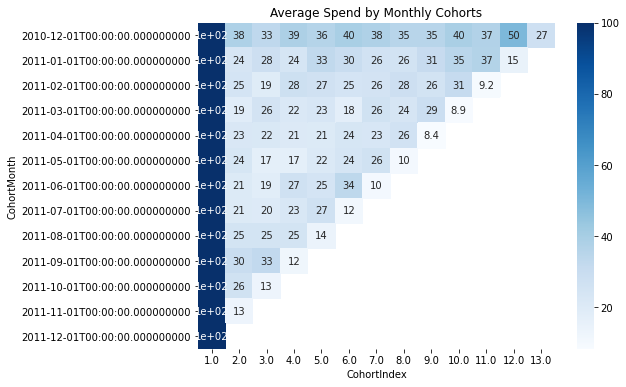

In [12]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention, annot=True, cmap='Blues')
plt.show()

## 2. Recency, Frequency, Monetary Value analysis

In this second chapter, you will learn about customer segments. Specifically, you will get exposure to recency, frequency and monetary value, create customer segments based on these concepts, and analyze your results.

### Calculate spend quartiles (q=4)

We have created a dataset for you with random CustomerID and Spend values as data. You will now use this dataset to group customers into quartiles based on Spend values and assign labels to each of them.

In [13]:
sample_csv = ',CustomerID,Spend\n0,0,137\n1,1,335\n2,2,172\n3,3,355\n4,4,303\n5,5,233\n6,6,244\n7,7,229\n'
data = pd.DataFrame([x.split(',') for x in sample_csv.split('\n')])

new_header = data.iloc[0] #grab the first row for the header
data = data[1:9] #take the data less the header row
data.columns = new_header #set the header row as the df header
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
data = data[['CustomerID', 'Spend']]

data

,CustomerID,Spend
1,0,137
2,1,335
3,2,172
4,3,355
5,4,303
6,5,233
7,6,244
8,7,229


In [14]:
# Create a spend quartile with 4 groups - a range between 1 and 5
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Assign the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = spend_quartile

# Print data with sorted Spend values
data.sort_values('Spend')

,CustomerID,Spend,Spend_Quartile
1,0,137,1
3,2,172,1
8,7,229,2
6,5,233,2
7,6,244,3
5,4,303,3
2,1,335,4
4,3,355,4


### Calculate recency deciles (q=4)

We have created a dataset for you with random CustomerID and Recency_Days values as data. You will now use this dataset to group customers into quartiles based on Recency_Days values and assign labels to each of them.

Be cautious about the labels for this exercise. You will see that the labels are inverse, and will required one additional step in separately creating them. If you need to refresh your memory on the process of creating the labels, check out the slides!

In [15]:
sample_csv = ',CustomerID,Recency_Days\n0,0,37\n1,1,235\n2,2,396\n3,3,72\n4,4,255\n5,5,393\n6,6,203\n7,7,133\n'
data = pd.DataFrame([x.split(',') for x in sample_csv.split('\n')])

new_header = data.iloc[0] #grab the first row for the header
data = data[1:9] #take the data less the header row
data.columns = new_header #set the header row as the df header
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
data = data[['CustomerID', 'Recency_Days']]

data

,CustomerID,Recency_Days
1,0,37
2,1,235
3,2,396
4,3,72
5,4,255
6,5,393
7,6,203
8,7,133


In [16]:
# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
data.sort_values('Recency_Days')

,CustomerID,Recency_Days,Recency_Quartile
1,0,37,4
4,3,72,4
8,7,133,3
7,6,203,3
2,1,235,2
5,4,255,2
6,5,393,1
3,2,396,1


### Calculate RFM values

Calculate Recency, Frequency and Monetary values for the online dataset we have used before - it has been loaded for you with recent 12 months of data. There's a TotalSum column in the online dataset which has been calculated by multiplying Quantity and UnitPrice: online['Quantity'] * online['UnitPrice'].

In [17]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate), max(online.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


Also, we have created a snapshot_date variable that you can use to calculate recency. 

In [18]:
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

In [19]:
online = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
online['TotalSum'] = online['Quantity']*online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


### Calculate 4 groups for recency and frequency

You will now group the customers into 4 separate groups based on Recency, and Frequency.

We will use the result from the exercise in the next one, where you will group customers based on the MonetaryValue and finally calculate and RFM_Score.

Once completed, print the results to the screen to make sure you have successfully created the quartile columns.

In [21]:
# Create labels for Recency, Frequency and Monetary
r_labels = range(4, 0, -1)
f_labels = range(1,5)
m_labels = range(1,5)

# Assign these labels to 4 equal percentile groups 
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

# Create new columns R, F and M
datamart = datamart.assign(R = r_quartiles.values)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


### Build RFM segment and RFM score

In [22]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


### Creating custom segments

It's your turn to create a custom segmentation based on RFM_Score values. You will create a function to build segmentation and then assign it to each customer.

In [23]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Low
12347.0,2,182,4310.00,4,4,4,444,12,Top
12348.0,75,31,1797.24,2,2,4,224,8,Middle
12349.0,19,73,1757.55,3,3,4,334,10,Top
12350.0,310,17,334.40,1,1,2,112,4,Low


### Analyzing custom segments

As a final step, you will analyze average values of Recency, Frequency and MonetaryValue for the custom segments you've created.

We have loaded the datamart dataset with the segment values you have calculated in the previous exercise.

In [24]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
rfm_level_agg.head()

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         193.2      15.0         239.1  1300
Middle       70.7      50.3         876.7  1793
Top          19.1     232.4        5017.4  1279

## 3. Data pre-processing for clustering

Once you created some segments, you want to make predictions. However, you first need to master practical data preparation methods to ensure your k-means clustering algorithm will uncover well-separated, sensible segments.

### Managing skewed variables


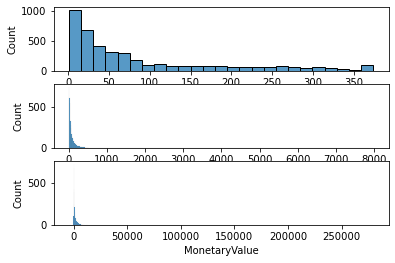

In [25]:
datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]

# Plot distribution of Recency
plt.subplot(3, 1, 1);
sns.histplot(datamart_rfm['Recency'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2);
sns.histplot(datamart_rfm['Frequency'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3);
sns.histplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

### Manage skewness

We've loaded the same dataset named data. Now your goal will be to remove skewness from var2 and var3 as they had a non-symmetric distribution as you've seen in the previous exercise plot. You will visualize them to make sure the problem is solved!

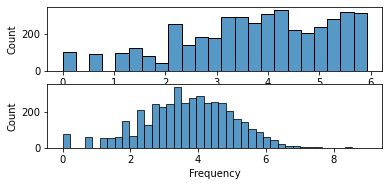

In [26]:
recency_log = np.log(datamart_rfm['Recency'])
frequency_log = np.log(datamart_rfm['Frequency'])

# Plot distribution of Recency
plt.subplot(3, 1, 1);
sns.histplot(recency_log)

# Plot distribution of Frequency
plt.subplot(3, 1, 2);
sns.histplot(frequency_log)
plt.show()

### Center and scale manually

- Center the data by subtracting average values from each entry.
- Scale the data by dividing each entry by standard deviation.
- Combine two above actions and normalize the data by applying both centering and scaling.
- Print summary statistics to make sure average is zero and standard deviation is one, and round the output to 2 decimals.

In [27]:
# Center the data by subtracting average values from each entry
datamart_centered = datamart_rfm - datamart_rfm.mean()

# Scale the data by dividing each entry by standard deviation
datamart_scaled = datamart_rfm / datamart_rfm.std()

# Normalize the data by applying both centering and scaling
datamart_normalized = (datamart_rfm - datamart_rfm.mean()) / datamart_rfm.std()

# Print summary statistics to make sure average is zero and standard deviation is one
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4372.00,4372.00,4372.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-0.90,-0.40,-0.75
25%,-0.74,-0.33,-0.20
50%,-0.42,-0.22,-0.15
75%,0.51,0.04,-0.03
max,2.80,33.94,33.77


### Center and scale with StandardScaler()

- Initialize StandardScaler instance as scaler and fit it to the data
- Transform the data by scaling and centering it with scaler.
- Create a pandas DataFrame from data_normalized by adding index and column names from data.
- Print summary statistics to make sure average is zero and standard deviation is one, and round the results to 2 decimals.

In [28]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(datamart_rfm)

# Scale and center the data
data_normalized = scaler.transform(datamart_rfm)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4372.00,4372.00,4372.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.90,-0.40,-0.75
25%,-0.74,-0.33,-0.20
50%,-0.42,-0.22,-0.15
75%,0.51,0.04,-0.03
max,2.80,33.94,33.78


In [29]:
datamart_rfm = pd.read_csv('online_datamart_rfm.csv')
datamart_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


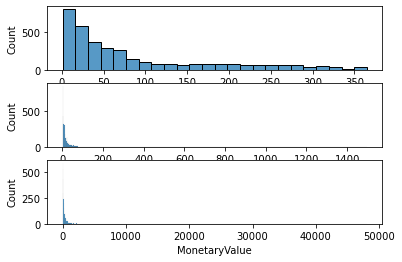

In [30]:
# Plot distribution of Recency
plt.subplot(3, 1, 1);
sns.histplot(datamart_rfm['Recency'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2);
sns.histplot(datamart_rfm['Frequency'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3);
sns.histplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

### Pre-process RFM data

We have loaded the dataset with RFM values you calculated previously as datamart_rfm. Since the variables are skewed and are on different scales, you will now un-skew and normalize them.

In [31]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_log.index, columns=datamart_log.columns)

### Visualize the normalized variables

Great work! Now you will plot the normalized and unskewed variables to see the difference in the distribution as well as the range of the values. The datamart_normalized dataset from the previous exercise is loaded.

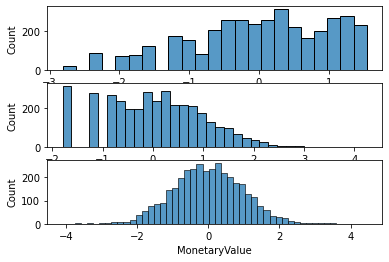

In [32]:
# Plot distribution of Recency
plt.subplot(3, 1, 1);
sns.histplot(datamart_normalized['Recency'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2);
sns.histplot(datamart_normalized['Frequency'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3);
sns.histplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

### Run k-means

You will now build a 3 clusters with k-means clustering. We have loaded the pre-processed RFM dataset as datamart_normalized. We have also loaded the pandas library as pd.

In [33]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### Assign labels to raw data

You will now analyze the average RFM values of the three clusters you've created in the previous exercise. We have loaded the raw RFM dataset as datamart_rfm, and the cluster labels as cluster_labels. pandas is available as pd.

In [34]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
datamart_clustered = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)
datamart_clustered

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         125.0       6.9         133.3  1075
1          26.3      40.2         822.0  1327
2         129.1       6.0          93.7  1241

### Choosing the number of clusters

In this exercise, you will calculate the sum of squared errors for different number of clusters ranging from 1 to 20. In this example we are using a custom created dataset to get a cleaner elbow read.

In [35]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

sse

{1: 13115.999999999978,
 2: 8988.644490981602,
 3: 5408.404670803712,
 4: 4013.8332435075,
 5: 2937.955300849443,
 6: 2323.156239457473,
 7: 1861.9460822247697,
 8: 1625.8693278690557,
 9: 1419.5905268805416,
 10: 1282.8433675252234,
 11: 1134.2452132329486,
 12: 1029.315144697526,
 13: 911.8899864746235,
 14: 819.2676798534649,
 15: 733.4891068723036,
 16: 670.1691814846318,
 17: 602.1365773081952,
 18: 551.2462215118913,
 19: 503.7917909222532,
 20: 474.82179384643473}

### Plot sum of squared errors
Now you will plot the sum of squared errors for each value of k and identify if there is an elbow. This will guide you towards the recommended number of clusters to use.

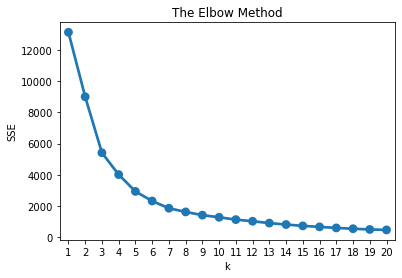

In [36]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Profile and inerpret segments

#### Prepare data for the snake plot
Now you will prepare data for the snake plot. You will use the 3-cluster RFM segmentation solution you have built previously. You will transform the normalized RFM data into a long format by "melting" the metric columns into two columns - one for the name of the metric, and another for the actual numeric value.

In [37]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_rfm_k3.reset_index(), 
                        
                    # Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

                    # Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
                    # Name the variable and value
                    value_name='Value', var_name='Metric'
					)
datamart_melt.head()

,CustomerID,Cluster,Metric,Value
0,12747,1,Recency,3.0
1,12748,1,Recency,1.0
2,12749,1,Recency,4.0
3,12820,1,Recency,4.0
4,12822,0,Recency,71.0


#### Visualize snake plot
Good work! You will now use the melted dataset to build the snake plot. The melted data is loaded as datamart_melt.

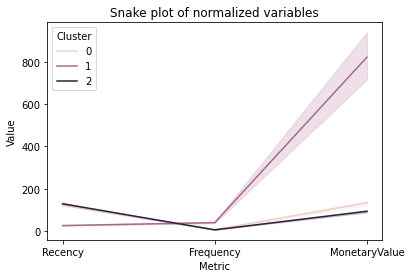

In [38]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

#### Calculate relative importance of each attribute
Now you will calculate the relative importance of the RFM values within each cluster.

In [39]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
relative_imp.round(2)

,CustomerID,Recency,Frequency,MonetaryValue
Cluster,,,,
0,-0.10,0.38,-0.63,-0.64
1,0.01,-0.71,1.15,1.22
2,0.08,0.43,-0.68,-0.75


#### Plot relative importance heatmap
Great job! Now you will build a heatmap visualizing the relative scores for each cluster.

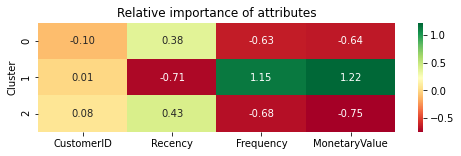

In [40]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()